# <div align="right">Machine Learning
### <div align="right"> *Followblindly*

# 2 - Linear Regression

Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out **cause and effect relationship between variables**. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables. Regression problems usually have one continuous and unbounded dependent variable. The inputs, however, can be continuous, discrete, or even categorical data such as gender, nationality, brand, and so on.

<img src="2_images/2_Regression.SVG" width=500px/>

Linear regression with multiple variables is also known as "**multivariate linear regression**". The multivariable form of the hypothesis function accommodating these multiple features is as follows:

$$
\begin{align*} 
&Hypothesis: h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + \cdot\cdot\cdot + \theta_{n}x_{n} \\
&Cost Function: J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 \\
&Goal: \min_{\theta}J(\theta)
\end{align*}
$$

Using the definition of matrix multiplication, our multivariable hypothesis function can be concisely represented as:

$$ h_{\theta}(x) = 
\begin{bmatrix}
\theta_{0} & \theta_{1} & \cdot\cdot\cdot & \theta_{n}
\end{bmatrix}
\begin{bmatrix}
x_{0} \\
x_{1} \\
\cdot\cdot\cdot \\
x_{n}
\end{bmatrix}
= \theta^{T}x
$$

### Gradient Descent for Linear Regression

Gradient descent is a generic optimization algorithm used in many machine learning algorithms. It iteratively tweaks the parameters of the model in order to minimize the cost function. We do this is by taking the **derivative** (the tangential line to a function) of our cost function. The slope of the tangent is the derivative at that point and it will give us a direction to move towards. We make steps down the cost function in the direction with the steepest descent. The size of each step is determined by the parameter **$\alpha$**, which is called the **learning rate**. The **gradient descent algorithm** can be represented as:

$$\begin{align*}  
&\frac{\partial J(\theta)}{\partial \theta_{0}}= \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)}) \\
&\frac{\partial J(\theta)}{\partial \theta_{j}}= \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)} \\
\end{align*}
$$

$$
\begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_{0}} \\
\frac{\partial J(\theta)}{\partial \theta_{1}} \\
\cdot\cdot\cdot \\
\frac{\partial J(\theta)}{\partial \theta_{n}}
\end{bmatrix}
=
\frac{1}{m}x^{T}(h_{\theta}(x)-y)
$$

$$
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\cdot\cdot\cdot \\
\theta_{n}
\end{bmatrix}
= 
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
\cdot\cdot\cdot \\
\theta_{n}
\end{bmatrix} 
-
\alpha
\begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_{0}} \\
\frac{\partial J(\theta)}{\partial \theta_{1}} \\
\cdot\cdot\cdot \\
\frac{\partial J(\theta)}{\partial \theta_{n}}
\end{bmatrix}
$$

$$\begin{align*}  
&repect\ until \ convergence\{ \\
&\ \ \ \ \theta_{j} :=\theta_{j} - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_{j}^{(i)}) \ \ \ \ for \ j := 0 \cdot\cdot\cdot n \\
&\} \\
\end{align*}
$$

To demonstrate the gradient descent algorithm, we initialize the model parameters with 0. The equation becomes $h_{\theta}(x) = 0$. Gradient descent algorithm now tries to update the value of the parameters so that we arrive at the best fit line.

We should adjust our parameter $\alpha$ to ensure that the gradient descent algorithm converges in a reasonable time. **If $\alpha$ is too small**, gradient descent can be slow. **If $\alpha$ is too large**, gradient descent can overshoot the minimum. It may fail to converge, or even diverge. Failure to converge or too much time to obtain the minimum value imply that our step size is wrong.

<img src="2_images/2_Gradient_Descent.PNG" width=500px/>

We can **speed up gradient descent** by having each of our input values in roughly the same range. This is because $\theta$ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.

Two techniques to help with this are feature scaling and mean normalization. **Feature scaling** involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. **Mean normalization** involves subtracting the average value for an input variable from the values for that input variable resulting in a new average value for the input variable of just zero. To implement both of these techniques, adjust your input values as shown in this formula:

$$ x_{i} := \frac{(x_{i}-\mu_{i})}{s_{i}} $$

Where $\mu_{i}$ is the average of all the values for feature (i) and $s_{i}$ is the range of values (max - min), or $s_{i}$ is the standard deviation. Note that dividing by the range, or dividing by the standard deviation, give different results.

### Normal Equation for Linear Regression

Gradient descent gives one way of minimizing J. In the "**Normal Equation**" method, we will minimize J by explicitly taking its derivatives with respect to the $\theta_{j}$ ’s, and setting them to zero. This allows us to find the optimum theta without iteration. The normal equation formula is given below: 

 
$$ \theta = (X^{T}X)^{-1}X^{T}y $$

The following is a comparison of gradient descent and the normal equation:

| Gradient Descent      | Normal Equation |
| :-------------------------------------------- | :-------------------------------------------- |
| Need to choose alpha            | No need to choose alpha       |
| Needs many iterations   | No need to iterate        |
| $O(kn^{2})$      | $O(n^{3})$, need to calculate inverse of $X^{T}X$       |
| Works well when n is large     | Slow if n is very large       |

With the normal equation, computing the inversion has complexity $O(n^{3})$. So if we have a very large number of features, the normal equation will be **slow**. In practice, when n exceeds 10,000 it might be a good time to go from a normal solution to an iterative process.

If $X^{T}X$ is **noninvertible**, the common causes might be having :
* Redundant features, where two features are very closely related (i.e. they are linearly dependent)
* Too many features (e.g. m ≤ n). In this case, delete some features or use "regularization".

Solutions to the above problems include deleting a feature that is linearly dependent with another or deleting one or more features when there are too many features.

### Evaluating the performance of the Linear Regression Model

We will be using **Root mean squared error(RMSE)** and **Coefficient of Determination(R² score)** to evaluate our model. RMSE is the square root of the average of the sum of the squares of residuals. RMSE is defined by:

$$ RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2}$$

R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression. It can be defined by:

$$ R^{2} = 1- \frac{SS_{r}}{SS{t}} $$

Where $SS_{t}$ is the total sum of errors if we take the mean of the observed values as the predicted value and $SS_{r}$ is the sum of the square of residuals.

$$ SS_{t} = \sum_{i=1}^{m}(y^{(i)}-\bar{y})^2 \\
SS_{r} = \sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2
$$

### Dataset Initialization 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

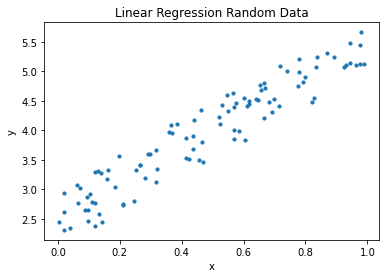

In [9]:
# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x,y,s=10)
plt.title('Linear Regression Random Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Implementing Linear Regression from scratch

In [10]:
class LinearRegressionUsingGD:
    def __init__(self, learning_rate=0.05, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, x, y):
        self.cost = [] # record the cost function
        self.theta = np.zeros((x.shape[1], 1)) # Parameter initialization
        self.m = x.shape[0]

        for i in range(self.n_iterations):
            y_pred = np.dot(x, self.theta) # h_{\theta}(x)
            residuals = y_pred - y # (h_{\theta}(x) - y)
            gradient_vector = np.dot(x.T, residuals) # x^{T}.(h_{\theta}(x) - y)
            self.theta -= (self.learning_rate / self.m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * self.m) # cost function (1/2m).sum(h_{\theta}(x) - y)^2)
            self.cost.append(cost)   
        return self

    def predict(self, x):
        return np.dot(x, self.theta)

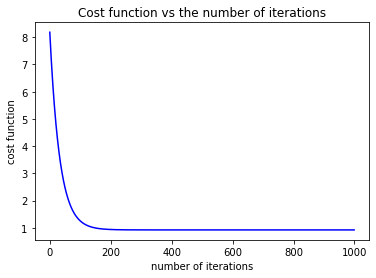

In [11]:
# Model initialization
Linear_Regression_GD = LinearRegressionUsingGD()
# Fit the data(train the model)
Linear_Regression_GD.fit(x, y)
# Predict
y_pred = Linear_Regression_GD.predict(x)

# plotting cost function vs the number of iterations

plt.title('Cost function vs the number of iterations')
plt.xlabel('number of iterations')
plt.ylabel('cost function')

plt.plot(range(0, Linear_Regression_GD.n_iterations), Linear_Regression_GD.fit(x, y).cost, color='b')
plt.show()

### Implementing Linear Regression from Scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875007
R2 score:  0.9038655568672764


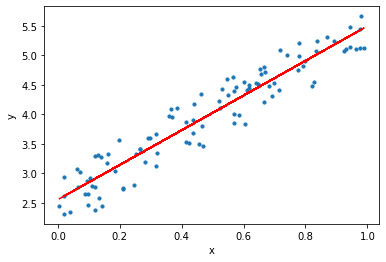

In [13]:
# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()

### References:

$[1] \ \ \ \ Agarwal, A. (2018, November 14). Linear Regression using Python. Medium. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2. $

$[2] \ \ \ \ Ng, A. (n.d.). Machine Learning. Coursera. https://www.coursera.org/learn/machine-learning. $